In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))


['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_data = iris.data

print(iris_data.shape)

(150, 4)


In [4]:
iris_data[0]

#결과물 순서대로 sepal length, sepal width, petal length, petal width를 나타냄

array([5.1, 3.5, 1.4, 0.2])

In [6]:
#머신러닝이 출력해야 하는 정답을 라벨(label) 또는 타겟(target)이라고 함

iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

#target의 값이 0,1,2 -> 0이 setosa, 1dl versicolor, 3이 virginica가 되는 것

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
#각 feature에 대한 설명
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
#파일 저장된 경로
iris.filename

'/opt/conda/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [12]:
import pandas as pd

print(pd.__version__)

1.2.0


In [14]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
#문제지-모델에 입력되는 데이터, feature
#정답지-모델이 맞추어야 하는 데이터, labe, target

#데이터셋 분리 : scikit-learn - train_test_split

from sklearn.model_selection import train_test_split

#iris_data : feature, 품종 맞추기 위해 입력받는 특징 데이터
#iris_label : label, 모델이 맞추어야 하는 정답값
#test_size :  test dataset의 크기를 조절할 수 있음. 0.2는 전체의 20%만 데이터로 사용하겠다는 의미
#random_state : train데이터, test 데이터를 분리하는데 적용되는 랜덤성 결정
#완벽한 랜덤이라 할 순 없음. 
#랜덤 조절하는 값이 random_state, random_seed. 이 값이 같으면 코드는 항상 같은 랜덤 결과

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size =0.2, random_state = 7)
#X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
#                                                test_size =0.2, random_state=iris_label)
#이렇게 state를 바꿔주면 y_test에 나오는 라벨 갯수들이 딱 맞아떨어지게 됨
#왜그럴까???????????????????

print('X_train :', len(X_train), ', X_test:', len(X_test))


X_train : 120 , X_test: 30


In [17]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [18]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [19]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

In [22]:
#지도학습 중 분류를 할 수 있는 모델을 사용해야 함.
#의사결정트리 (Decision Tree) 모델

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 32)
print(decision_tree._estimator_type)

classifier


In [24]:
#모델 학습
#fit : training dataset에 맞게 모델을 피팅하는 것

decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=32)

In [25]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [26]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [29]:
from sklearn.metrics import accuracy_score

#정확도는 전체 개수 중 맞은 거의 개수를 수치로 나타내는 것.

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9

In [35]:
#Decision Tree 모델 학습, 예측하기

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                   test_size = 0.2,
                                                   random_state = 7)

#모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state = 32)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [40]:
#RandomForest : Decision Tree를 여러개 모아놓은 모델 -> dkdtkdqmf rlqjq

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size = 0.2, 
                                                   random_state = 21)

random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [52]:
#SupportVector Machine (SVM)

from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size = 0.2, 
                                                   random_state = 21)
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



In [55]:
#Stochastic Gradient Descent Classifier (SGD)

from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size = 0.2, 
                                                   random_state = 21)

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.75      0.86        12
           2       0.88      1.00      0.93         7

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.91      0.90      0.90        30



In [58]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                   test_size = 0.2, 
                                                   random_state = 21)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [60]:
#정확도 함정 알아차기리
#MNist 손글씨 데이터 세트

from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [61]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [62]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

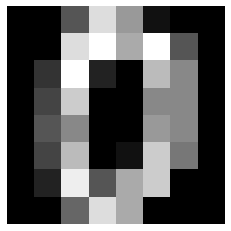

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

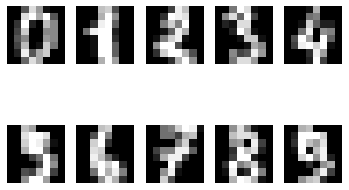

In [64]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [70]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]
digits.keys()

(1797,)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [66]:
#해당 이미지 데이터가 3인지 아닌지 맞추는, 3이라면 3을 3이 아니라면 0을 출력

new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [67]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=21)

decision_tree = DecisionTreeClassifier(random_state = 32)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

#모델이 학습을 하지 않고 정답을 모두 0으로 선택해도 정확도가 90%가량이 됨.


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       319
           3       0.83      0.71      0.76        41

    accuracy                           0.95       360
   macro avg       0.90      0.84      0.87       360
weighted avg       0.95      0.95      0.95       360



In [68]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

#90퍼 가량은 아니지만 높게 나옴. 불균형한 데이터, 언밸런스 데이터에서 많이 발생함.
#정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있음.
#정확도 외 다양한 평가 척도를 사용해야 함.

0.8861111111111111

In [74]:
#오차행렬
#TN(True Negative), FP(False Positive), FN(False Negative), TP(True Positive)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

#왼쪽 위부터 순서대로 TP, FN, FP, TN의 개수
#손글씨에서 0은 positive, 3은 negative

array([[313,   6],
       [ 12,  29]])

In [75]:
confusion_matrix(y_test, fake_pred)

# 모든 데이터를 0, 즉 Positive로 예측했고 
# Negative로 예측한 것은 없기 때문에 FN과 TN은 둘 다 0

array([[319,   0],
       [ 41,   0]])

In [76]:
#precision, recall, F1score 각각 얼마인지 확인

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       319
           3       0.83      0.71      0.76        41

    accuracy                           0.95       360
   macro avg       0.90      0.84      0.87       360
weighted avg       0.95      0.95      0.95       360



In [77]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       319
           3       0.00      0.00      0.00        41

    accuracy                           0.89       360
   macro avg       0.44      0.50      0.47       360
weighted avg       0.79      0.89      0.83       360



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.95, 0.8861111111111111)

In [80]:
#load_digits : 손글씨
#총 1797개
#feature는 64개의 픽셀값 (8x8 이미지)
#label은 0~9 사이의 숫자

In [81]:
#load_wine : 와인
#총 178개
#feature는 총 13개로, Alcohol, Malic acid, Color intensity 등 와인의 특성값
#label은 class 0, 1, 2의 세 가지 카테고리

In [ ]:
#load_breast_cancer : 유방암
#총 569개
#feature는 real, positive
#label은 class 0,1 두 가지 카테고리